In [1]:
# Import pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read in CSV from https://www.basketball-reference.com/leagues/NBA_2021_per_game.html
df = pd.read_csv("basketballref2020.csv")

In [3]:
# Print the first 5 rows
print(df.head())

  Rk                       Player Pos   Age   Tm     G    GS    MP   FG   FGA  \
0  1   Precious Achiuwa\achiupr01  PF  21.0  MIA  61.0   4.0  12.1  2.0   3.7   
1  2       Jaylen Adams\adamsja01  PG  24.0  MIL   7.0   0.0   2.6  0.1   1.1   
2  3       Steven Adams\adamsst01   C  27.0  NOP  58.0  58.0  27.7  3.3   5.3   
3  4        Bam Adebayo\adebaba01   C  23.0  MIA  64.0  64.0  33.5  7.1  12.5   
4  5  LaMarcus Aldridge\aldrila01   C  35.0  TOT  26.0  23.0  25.9  5.4  11.4   

   ...    FT%  ORB  DRB  TRB  AST  STL  BLK  TOV   PF   PTS  
0  ...  0.509  1.2  2.2  3.4  0.5  0.3  0.5  0.7  1.5   5.0  
1  ...    NaN  0.0  0.4  0.4  0.3  0.0  0.0  0.0  0.1   0.3  
2  ...  0.444  3.7  5.2  8.9  1.9  0.9  0.7  1.3  1.9   7.6  
3  ...  0.799  2.2  6.7  9.0  5.4  1.2  1.0  2.6  2.3  18.7  
4  ...  0.872  0.7  3.8  4.5  1.9  0.4  1.1  1.0  1.8  13.5  

[5 rows x 30 columns]


In [4]:
# Get the summary
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706 entries, 0 to 705
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      706 non-null    object 
 1   Player  705 non-null    object 
 2   Pos     705 non-null    object 
 3   Age     705 non-null    float64
 4   Tm      705 non-null    object 
 5   G       705 non-null    float64
 6   GS      705 non-null    float64
 7   MP      705 non-null    float64
 8   FG      705 non-null    float64
 9   FGA     705 non-null    float64
 10  FG%     703 non-null    float64
 11  3P      705 non-null    float64
 12  3PA     705 non-null    float64
 13  3P%     670 non-null    float64
 14  2P      705 non-null    float64
 15  2PA     705 non-null    float64
 16  2P%     699 non-null    float64
 17  eFG%    703 non-null    float64
 18  FT      705 non-null    float64
 19  FTA     705 non-null    float64
 20  FT%     676 non-null    float64
 21  ORB     705 non-null    float64
 22  DR

In [5]:
# Print just the player column
print(df["Player"])
# This will require some cleaning

0       Precious Achiuwa\achiupr01
1           Jaylen Adams\adamsja01
2           Steven Adams\adamsst01
3            Bam Adebayo\adebaba01
4      LaMarcus Aldridge\aldrila01
                  ...             
701       Thaddeus Young\youngth01
702           Trae Young\youngtr01
703          Cody Zeller\zelleco01
704          Ivica Zubac\zubaciv01
705                            NaN
Name: Player, Length: 706, dtype: object


In [6]:
#We previously only had 2 of the defensive columns (BLK and STL) accesable to us. I'm going to 
#https://www.basketball-reference.com/leagues/NBA_2021_advanced.html and creating a new CSV using code analogous
#to that which Eli used to create the table df above, as having this data frame will give us access to 4 more 
#defensive stats to base our linear model on.

In [7]:
# Read in new CSV with Defensive Win Shares and and Defensive Box Plus/Minus
df2 = pd.read_csv("bballadvanced.csv")

In [8]:
df2

,Rk,Player,STL%,BLK%,DWS,DBPM
0,1,Precious Achiuwa\achiupr01,1.3,4.0,1.0,-0.5
1,2,Jaylen Adams\adamsja01,0.0,0.0,0.0,-4.6
2,3,Steven Adams\adamsst01,1.6,2.2,1.7,0.1
3,4,Bam Adebayo\adebaba01,1.7,3.2,3.2,2.0
4,5,LaMarcus Aldridge\aldrila01,0.8,3.7,0.6,-0.2
...,...,...,...,...,...,...
700,536,Delon Wright\wrighde01,3.0,1.3,0.5,0.6
701,537,Thaddeus Young\youngth01,2.2,2.1,2.2,1.4
702,538,Trae Young\youngtr01,1.2,0.5,1.3,-1.7
703,539,Cody Zeller\zelleco01,1.3,1.7,1.1,-0.2


In [9]:
#We see here that df and fd2 are in the same order as far as which player goes where.

In [10]:
df

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa\achiupr01,PF,21.0,MIA,61.0,4.0,12.1,2.0,3.7,...,0.509,1.2,2.2,3.4,0.5,0.3,0.5,0.7,1.5,5.0
1,2,Jaylen Adams\adamsja01,PG,24.0,MIL,7.0,0.0,2.6,0.1,1.1,...,NaN,0.0,0.4,0.4,0.3,0.0,0.0,0.0,0.1,0.3
2,3,Steven Adams\adamsst01,C,27.0,NOP,58.0,58.0,27.7,3.3,5.3,...,0.444,3.7,5.2,8.9,1.9,0.9,0.7,1.3,1.9,7.6
3,4,Bam Adebayo\adebaba01,C,23.0,MIA,64.0,64.0,33.5,7.1,12.5,...,0.799,2.2,6.7,9.0,5.4,1.2,1.0,2.6,2.3,18.7
4,5,LaMarcus Aldridge\aldrila01,C,35.0,TOT,26.0,23.0,25.9,5.4,11.4,...,0.872,0.7,3.8,4.5,1.9,0.4,1.1,1.0,1.8,13.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,537,Thaddeus Young\youngth01,PF,32.0,CHI,68.0,23.0,24.3,5.4,9.7,...,0.628,2.5,3.8,6.2,4.3,1.1,0.6,2.0,2.2,12.1
702,538,Trae Young\youngtr01,PG,22.0,ATL,63.0,63.0,33.7,7.7,17.7,...,0.886,0.6,3.3,3.9,9.4,0.8,0.2,4.1,1.8,25.3
703,539,Cody Zeller\zelleco01,C,28.0,CHO,48.0,21.0,20.9,3.8,6.8,...,0.714,2.5,4.4,6.8,1.8,0.6,0.4,1.1,2.5,9.4
704,540,Ivica Zubac\zubaciv01,C,23.0,LAC,72.0,33.0,22.3,3.6,5.5,...,0.789,2.6,4.6,7.2,1.3,0.3,0.9,1.1,2.6,9.0


In [11]:
df2

,Rk,Player,STL%,BLK%,DWS,DBPM
0,1,Precious Achiuwa\achiupr01,1.3,4.0,1.0,-0.5
1,2,Jaylen Adams\adamsja01,0.0,0.0,0.0,-4.6
2,3,Steven Adams\adamsst01,1.6,2.2,1.7,0.1
3,4,Bam Adebayo\adebaba01,1.7,3.2,3.2,2.0
4,5,LaMarcus Aldridge\aldrila01,0.8,3.7,0.6,-0.2
...,...,...,...,...,...,...
700,536,Delon Wright\wrighde01,3.0,1.3,0.5,0.6
701,537,Thaddeus Young\youngth01,2.2,2.1,2.2,1.4
702,538,Trae Young\youngtr01,1.2,0.5,1.3,-1.7
703,539,Cody Zeller\zelleco01,1.3,1.7,1.1,-0.2


In [12]:
#Drop the last row of df and then index through df2 and assign the new vars to df 
#(as opposed to merging which I initially tried)

In [13]:
df=df.drop(705)

In [14]:
df["STL%"]=df2["STL%"]

In [15]:
df["BLK%"]=df2["BLK%"]

In [16]:
df["DWS"]=df2["DWS"]

In [17]:
df["DBPM"]=df2["DBPM"]

In [18]:
df

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,AST,STL,BLK,TOV,PF,PTS,STL%,BLK%,DWS,DBPM
0,1,Precious Achiuwa\achiupr01,PF,21.0,MIA,61.0,4.0,12.1,2.0,3.7,...,0.5,0.3,0.5,0.7,1.5,5.0,1.3,4.0,1.0,-0.5
1,2,Jaylen Adams\adamsja01,PG,24.0,MIL,7.0,0.0,2.6,0.1,1.1,...,0.3,0.0,0.0,0.0,0.1,0.3,0.0,0.0,0.0,-4.6
2,3,Steven Adams\adamsst01,C,27.0,NOP,58.0,58.0,27.7,3.3,5.3,...,1.9,0.9,0.7,1.3,1.9,7.6,1.6,2.2,1.7,0.1
3,4,Bam Adebayo\adebaba01,C,23.0,MIA,64.0,64.0,33.5,7.1,12.5,...,5.4,1.2,1.0,2.6,2.3,18.7,1.7,3.2,3.2,2.0
4,5,LaMarcus Aldridge\aldrila01,C,35.0,TOT,26.0,23.0,25.9,5.4,11.4,...,1.9,0.4,1.1,1.0,1.8,13.5,0.8,3.7,0.6,-0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,536,Delon Wright\wrighde01,PG,28.0,SAC,27.0,8.0,25.8,3.9,8.3,...,3.6,1.6,0.4,1.3,1.1,10.0,3.0,1.3,0.5,0.6
701,537,Thaddeus Young\youngth01,PF,32.0,CHI,68.0,23.0,24.3,5.4,9.7,...,4.3,1.1,0.6,2.0,2.2,12.1,2.2,2.1,2.2,1.4
702,538,Trae Young\youngtr01,PG,22.0,ATL,63.0,63.0,33.7,7.7,17.7,...,9.4,0.8,0.2,4.1,1.8,25.3,1.2,0.5,1.3,-1.7
703,539,Cody Zeller\zelleco01,C,28.0,CHO,48.0,21.0,20.9,3.8,6.8,...,1.8,0.6,0.4,1.1,2.5,9.4,1.3,1.7,1.1,-0.2


In [19]:
# Create a new dataframe that is a copy of the old one
dfNew = df

# Create a new column in the new dataframe that is just the player's name (without the 9 character ID code)
dfNew['Name'] = dfNew['Player'].str[:-10]
# See if it worked
print(dfNew.iloc[1:5, :])
dfNew.info()
# The new name column was successfully created

  Rk                       Player Pos   Age   Tm     G    GS    MP   FG   FGA  \
1  2       Jaylen Adams\adamsja01  PG  24.0  MIL   7.0   0.0   2.6  0.1   1.1   
2  3       Steven Adams\adamsst01   C  27.0  NOP  58.0  58.0  27.7  3.3   5.3   
3  4        Bam Adebayo\adebaba01   C  23.0  MIA  64.0  64.0  33.5  7.1  12.5   
4  5  LaMarcus Aldridge\aldrila01   C  35.0  TOT  26.0  23.0  25.9  5.4  11.4   

   ...  STL  BLK  TOV   PF   PTS  STL%  BLK%  DWS  DBPM               Name  
1  ...  0.0  0.0  0.0  0.1   0.3   0.0   0.0  0.0  -4.6       Jaylen Adams  
2  ...  0.9  0.7  1.3  1.9   7.6   1.6   2.2  1.7   0.1       Steven Adams  
3  ...  1.2  1.0  2.6  2.3  18.7   1.7   3.2  3.2   2.0        Bam Adebayo  
4  ...  0.4  1.1  1.0  1.8  13.5   0.8   3.7  0.6  -0.2  LaMarcus Aldridge  

[4 rows x 35 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 705 entries, 0 to 704
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk

In [20]:
# Create a new dataframe that reorders the columns
dfReordered = dfNew[['Name','Pos','Tm','Age','G','GS','MP','FG', 'FGA','FG%','3P','3PA','3P%',
                     '2P','2PA','2P%','eFG%','FT','FTA','FT%','ORB','DRB','TRB','AST','STL','BLK','STL%',
                     'BLK%','DWS','DBPM','TOV','PF','PTS']]
# Key: Name, Position, Team, Age, Games, Games Started, Minutes Played, Field Goals, Field Goal Attempts,
# 3 Pointers, 3 Point Attempts, 3 Point Percentage, 2 Pointers, 2 Ppoint Percentage, Effective Field Goal Percentage
# Free Throws, Free Throw Attempts, Free Throw Percentage, Offensive Rebounds, Defensive Rebounds, Total Rebounds,
# Assists, Steals, Blocks, Steal Percentage, Block Percentage, Defensive Win Shares, Defensive Box Plus/Minus,
# Turnover per game, Personal Fouls, Points

print(dfReordered.head()) # [5 rows x 33 columns] - got rid of 'Rank' and Player' 

                Name Pos   Tm   Age     G    GS    MP   FG   FGA    FG%  ...  \
0   Precious Achiuwa  PF  MIA  21.0  61.0   4.0  12.1  2.0   3.7  0.544  ...   
1       Jaylen Adams  PG  MIL  24.0   7.0   0.0   2.6  0.1   1.1  0.125  ...   
2       Steven Adams   C  NOP  27.0  58.0  58.0  27.7  3.3   5.3  0.614  ...   
3        Bam Adebayo   C  MIA  23.0  64.0  64.0  33.5  7.1  12.5  0.570  ...   
4  LaMarcus Aldridge   C  TOT  35.0  26.0  23.0  25.9  5.4  11.4  0.473  ...   

   AST  STL  BLK  STL%  BLK%  DWS  DBPM  TOV   PF   PTS  
0  0.5  0.3  0.5   1.3   4.0  1.0  -0.5  0.7  1.5   5.0  
1  0.3  0.0  0.0   0.0   0.0  0.0  -4.6  0.0  0.1   0.3  
2  1.9  0.9  0.7   1.6   2.2  1.7   0.1  1.3  1.9   7.6  
3  5.4  1.2  1.0   1.7   3.2  3.2   2.0  2.6  2.3  18.7  
4  1.9  0.4  1.1   0.8   3.7  0.6  -0.2  1.0  1.8  13.5  

[5 rows x 33 columns]


In [21]:
# Make the names lowercase so the data can be merged by this column with the other dataframe that includes OVR score
dfReordered['Name'] = dfReordered['Name'].str.lower()
dfReordered['Name'] 

C:\Users\husto\AppData\Local\Temp/ipykernel_20580/2947717095.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfReordered['Name'] = dfReordered['Name'].str.lower()


0       precious achiuwa
1           jaylen adams
2           steven adams
3            bam adebayo
4      lamarcus aldridge
             ...        
700         delon wright
701       thaddeus young
702           trae young
703          cody zeller
704          ivica zubac
Name: Name, Length: 705, dtype: object

In [22]:
# See a list of the column names
cols = list(dfReordered.columns.values)
print(cols)

['Name', 'Pos', 'Tm', 'Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'STL%', 'BLK%', 'DWS', 'DBPM', 'TOV', 'PF', 'PTS']


In [23]:
# See the whole dataframe
dfReordered
# The last column seems to be useless

,Name,Pos,Tm,Age,G,GS,MP,FG,FGA,FG%,...,AST,STL,BLK,STL%,BLK%,DWS,DBPM,TOV,PF,PTS
0,precious achiuwa,PF,MIA,21.0,61.0,4.0,12.1,2.0,3.7,0.544,...,0.5,0.3,0.5,1.3,4.0,1.0,-0.5,0.7,1.5,5.0
1,jaylen adams,PG,MIL,24.0,7.0,0.0,2.6,0.1,1.1,0.125,...,0.3,0.0,0.0,0.0,0.0,0.0,-4.6,0.0,0.1,0.3
2,steven adams,C,NOP,27.0,58.0,58.0,27.7,3.3,5.3,0.614,...,1.9,0.9,0.7,1.6,2.2,1.7,0.1,1.3,1.9,7.6
3,bam adebayo,C,MIA,23.0,64.0,64.0,33.5,7.1,12.5,0.570,...,5.4,1.2,1.0,1.7,3.2,3.2,2.0,2.6,2.3,18.7
4,lamarcus aldridge,C,TOT,35.0,26.0,23.0,25.9,5.4,11.4,0.473,...,1.9,0.4,1.1,0.8,3.7,0.6,-0.2,1.0,1.8,13.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,delon wright,PG,SAC,28.0,27.0,8.0,25.8,3.9,8.3,0.462,...,3.6,1.6,0.4,3.0,1.3,0.5,0.6,1.3,1.1,10.0
701,thaddeus young,PF,CHI,32.0,68.0,23.0,24.3,5.4,9.7,0.559,...,4.3,1.1,0.6,2.2,2.1,2.2,1.4,2.0,2.2,12.1
702,trae young,PG,ATL,22.0,63.0,63.0,33.7,7.7,17.7,0.438,...,9.4,0.8,0.2,1.2,0.5,1.3,-1.7,4.1,1.8,25.3
703,cody zeller,C,CHO,28.0,48.0,21.0,20.9,3.8,6.8,0.559,...,1.8,0.6,0.4,1.3,1.7,1.1,-0.2,1.1,2.5,9.4


In [24]:
# Drop the last column
#dfReordered.drop(df.tail(1).index,inplace=True)
#dfReordered

In [25]:
############## Read in data from https://hoopshype.com/nba2k/2020-2021/

from bs4 import BeautifulSoup
import csv
import pandas as pd
import re

df = pd.read_csv("basketballref2020.csv")
soup = BeautifulSoup(open("page2.mht"), features="lxml")

with open('readme.txt', 'w') as f:
    f.write(soup.prettify())
    f.close()


In [26]:
# Each table row in this playerrows result object holds one player in our dataset
# It needs some cleaning
playerrows=soup.find_all('tr')
print(playerrows[2])

<tr>
<td class='3D"rank"' data-value='3D""'>1.</td>
<td class='3D"name"' data-value='3D""'>
<a href='3D"https://hoopshype.com/player/giannis-antetokounmp=' o="">
									Giannis Antetokounmpo								</a>
</td>
<td class='3D"value' data-value='3D"97"' hh-salaries-sorted="">
															97													</td>
</tr>


In [27]:
# Use soup.findall with the anonymous functions to isolate the individual parts (OVR score and name)
# Start with OVR Score
overallrows = soup.find_all(lambda tag: tag.name == 'td' and tag.get('class') == ['3D"value' ])
i=0
for ovr in overallrows:
   print(ovr)
   text = ovr.renderContents()
   overallrows[i]=text
   i=i+1
# We now see all the OVR scores isolated in rows, but they have to be cleaned even more 

<td class='3D"value' hh-salaries-sorted="">2020/21</td>
<td class='3D"value' data-value='3D"97"' hh-salaries-sorted="">
															97													</td>
<td class='3D"value' data-value='3D"97"' hh-salaries-sorted="">
															97													</td>
<td class='3D"value' data-value='3D"96"' hh-salaries-sorted="">
															96													</td>
<td class='3D"value' data-value='3D"96"' hh-salaries-sorted="">
															96													</td>
<td class='3D"value' data-value='3D"95"' hh-salaries-sorted="">
															95													</td>
<td class='3D"value' data-value='3D"95"' hh-salaries-sorted="">
															95													</td>
<td class='3D"value' data-value='3D"95"' hh-salaries-sorted="">
															95													</td>
<td class='3D"value' data-value='3D"94"' hh-salaries-sorted="">
															94													</td>
<td class='3D"value' data-value='3D"94"' hh-salaries-sorted="">
															94													</td>
<td class='3D"value' data-value='3D"91"' hh-

In [28]:
# Write a regex to get rid of leading and trailing stuff around the two digits that make up the OVR score
for ovr in overallrows:
    ovr=str(ovr)
    regex=r"[0-9]*[0-9]"
    ovr=re.search(regex,ovr).group(0)
    print(ovr)
# It worked, but the top number is 2020, which will need to be cleaned

2020
97
97
96
96
95
95
95
94
94
91
90
90
90
90
89
89
88
88
88
88
88
88
87
87
87
87
87
87
86
86
86
86
86
86
86
85
85
85
85
85
85
85
85
85
84
84
84
84
84
84
84
84
83
83
83
83
83
83
83
83
83
83
83
82
82
82
82
82
82
82
82
81
81
81
81
81
81
81
81
81
81
81
80
80
80
80
80
80
80
80
80
80
80
80
80
80
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
77
77
77
77
77
77
77
77
77
77
77
77
77
77
77
77
77
77
77
77
77
77
77
77
77
77
77
77
77
77
77
77
77
77
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73

In [29]:
# Now work on getting the player name
namerows = soup.find_all(lambda tag: tag.name == 'td' and tag.get('class') == ['3D"name"'])
# Need to find a way to get the 'a' tag from the td.
for name in namerows:
    for a in name.find_all('a', href=True):
        try:
            a=str(a)
            regex=r"[a-z]+-[a-z]+"
            regexName = re.search(regex, a).group(0)
            regexName = str(regexName)
            regexName = regexName.replace("-", " ")
            print(regexName)
        except AttributeError:
            a=str(a)
            regex= r"[a-z]+-[a-z]+"
            regexName = re.search(regex, a)
            regexName = str(regexName)
            regexName = regexName.replace("-", " ")
            print(regexName)

lebron james
giannis antetokounmp
kawhi leonard
james harden
stephen curry
kevin durant
anthony davis
luka doncic
damian lillard
joel embiid
paul george
nikola jokic
kyrie irving
karl anthony
klay thompson
jimmy butler
trae young
russell westbrook
pascal siakam
donovan mitchell
chris paul
bradley beal
rudy gobert
kyle lowry
kristaps porzingis
jayson tatum
devin booker
ben simmons
zion williamson
nikola vucevic
khris middleton
kemba walker
demar derozan
brandon ingram
bam adebayo
fred vanvleet
zach lavine
tj warren
john collins
jamal murray
ja morant
domantas sabonis
deaaron fox
andre drummond
tobias harris
shai gilgeous
lamarcus aldridge
jusuf nurkic
jaylen brown
deandre ayton
dangelo russell
cj mccollum
hassan whiteside
danilo gallinari
spencer dinwiddie
malcolm brogdon
jrue holiday
john wall
jaren jackson
gordon hayward
eric bledsoe
caris levert
blake griffin
montrezl harrell
victor oladipo
steven adams
kevin love
jonathan isaac
clint capela
brook lopez
andrew wiggins
demarcus cousin

In [30]:
list_names = []
list_ovr = []

for name in namerows:
    for a in name.find_all('a', href=True):
        try:
            a=str(a)
            regex= r"[a-z]+-[a-z]+"
            urlname = re.search(regex, a).group(0)
            urlname = str(urlname)
            urlname = urlname.replace("-", " ")
            #Add it to the dataframe
            list_names.append({'Name': urlname})

        except AttributeError:
            a=str(a)
            regex= r"[a-z]+-[a-z]+"
            urlname = re.search(regex, a)
            urlname = str(urlname)
            urlname = urlname.replace("-", " ")
            #Add it to the dataframe
            list_names.append({'Name': urlname})
            
for ovr in overallrows:
    ovr=str(ovr)
    #now need to write a regex to get rid of leading and trailing stuff around the two #'s
    regex=r"[0-9]*[0-9]"
    ovr=re.search(regex,ovr).group(0)
    list_ovr.append(ovr)
    
#Drop the first row of OVRs
list_ovr.pop(0)
      
# Make the names list a data frame
df_BOTH = pd.DataFrame(list_names)

# Add the ovr list to the dataframe as a column
df_BOTH['OVR'] = list_ovr

# Fix Giannis' name (it was shortened somehow in the html)
df_BOTH.iloc[1, 0] = "giannis antetokounmpo"


print(len(list_names))
print(len(list_ovr))
df_BOTH


585
585


,Name,OVR
0,lebron james,97
1,giannis antetokounmpo,97
2,kawhi leonard,96
3,james harden,96
4,stephen curry,95
...,...,...
580,marial shayok,67
581,justin robinson,67
582,robert franks,67
583,antonius cleveland,67


In [31]:
# Now we want to merge our two dataframes by name, so we can add the OVR column and only include the players in both

# Rename them to keep track of them
df1 = dfReordered # 704 rows x 33 columns
df_NAMEandOVR = df_BOTH # 585 rows x 2 columns

# Merge the two with an inner join by Name, preserving the order of the left keys
dfMerged = df_NAMEandOVR.merge(df1, how='inner', on='Name')

dfMerged # 456 rows × 34 columns

# We lost about 130 players when we merged the dataframes, likely due to spelling differences in the names

cols2 = list(dfMerged.columns.values)
print(cols)


['Name', 'Pos', 'Tm', 'Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'STL%', 'BLK%', 'DWS', 'DBPM', 'TOV', 'PF', 'PTS']


C:\Users\husto\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\husto\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\husto\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(

Text(0.5, 0, 'Age')

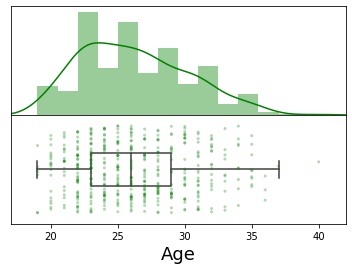

In [32]:
######### Visualization

fig, axs = plt.subplots(nrows=2)

sns.distplot(
    dfMerged['Age'], 
    ax=axs[0],
    color='green',
)
sns.stripplot(
    dfMerged['Age'], 
    jitter=0.4, 
    size=3,
    ax=axs[1],
    alpha=0.3,
    color='green'
)
age = sns.boxplot(
    dfMerged['Age'],
    width=0.3, 
    ax=axs[1],
    showfliers=False,
)

# Align axes
spacer = np.max(dfMerged['Age']) * 0.05
xmin = np.min(dfMerged['Age']) - spacer
xmax = np.max(dfMerged['Age']) + spacer
axs[0].set_xlim((xmin, xmax))
axs[1].set_xlim((xmin, xmax))

# Remove some axis text
axs[0].xaxis.set_visible(False)
axs[0].yaxis.set_visible(False)
axs[1].yaxis.set_visible(False)

# Put the two plots together
plt.subplots_adjust(hspace=0)

# Adjust boxplot fill to be white
axs[1].artists[0].set_facecolor('white')

# Rename Axis
age.set_xlabel("Age", fontsize = 18)

C:\Users\husto\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\husto\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\husto\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(

Text(0.5, 0, 'Offensive Rebounds')

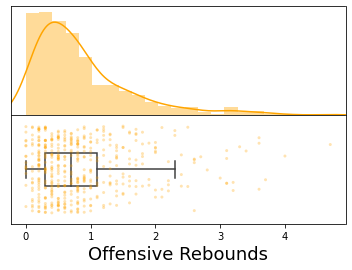

In [33]:
fig, axs = plt.subplots(nrows=2)

sns.distplot(
    dfMerged['ORB'], 
    ax=axs[0],
    color='orange'
)
sns.stripplot(
    dfMerged['ORB'], 
    jitter=0.4, 
    size=3,
    ax=axs[1],
    alpha=0.3,
    color='orange'
)
orb = sns.boxplot(
    dfMerged['ORB'],
    width=0.3, 
    ax=axs[1],
    showfliers=False,
)

# Align axes
spacer = np.max(dfMerged['ORB']) * 0.05
xmin = np.min(dfMerged['ORB']) - spacer
xmax = np.max(dfMerged['ORB']) + spacer
axs[0].set_xlim((xmin, xmax))
axs[1].set_xlim((xmin, xmax))

# Remove some axis text
axs[0].xaxis.set_visible(False)
axs[0].yaxis.set_visible(False)
axs[1].yaxis.set_visible(False)

# Put the two plots together
plt.subplots_adjust(hspace=0)

# Adjust boxplot fill to be white
axs[1].artists[0].set_facecolor('white')

# Rename Axis
orb.set_xlabel("Offensive Rebounds", fontsize = 18)

C:\Users\husto\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\husto\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\husto\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(

Text(0.5, 0, 'Defensive Rebounds')

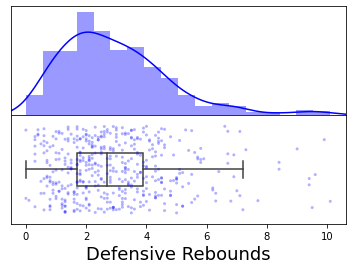

In [34]:
fig, axs = plt.subplots(nrows=2)

sns.distplot(
    dfMerged['DRB'], 
    ax=axs[0],
    color='blue'
)
sns.stripplot(
    dfMerged['DRB'], 
    jitter=0.4, 
    size=3,
    ax=axs[1],
    alpha=0.3,
    color='blue'
)
drb = sns.boxplot(
    dfMerged['DRB'],
    width=0.3, 
    ax=axs[1],
    showfliers=False,
)

# Align axes
spacer = np.max(dfMerged['DRB']) * 0.05
xmin = np.min(dfMerged['DRB']) - spacer
xmax = np.max(dfMerged['DRB']) + spacer
axs[0].set_xlim((xmin, xmax))
axs[1].set_xlim((xmin, xmax))

# Remove some axis text
axs[0].xaxis.set_visible(False)
axs[0].yaxis.set_visible(False)
axs[1].yaxis.set_visible(False)

# Put the two plots together
plt.subplots_adjust(hspace=0)

# Adjust boxplot fill to be white
axs[1].artists[0].set_facecolor('white')

# Rename Axis
drb.set_xlabel("Defensive Rebounds", fontsize = 18)

C:\Users\husto\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\husto\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\husto\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(

Text(0.5, 0, 'Steals')

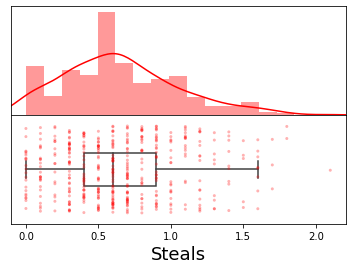

In [35]:
fig, axs = plt.subplots(nrows=2)

sns.distplot(
    dfMerged['STL'], 
    ax=axs[0],
    color='red'
)
sns.stripplot(
    dfMerged['STL'], 
    jitter=0.4, 
    size=3,
    ax=axs[1],
    alpha=0.3,
    color='red'
)
stl = sns.boxplot(
    dfMerged['STL'],
    width=0.3, 
    ax=axs[1],
    showfliers=False,
)

# Align axes
spacer = np.max(dfMerged['STL']) * 0.05
xmin = np.min(dfMerged['STL']) - spacer
xmax = np.max(dfMerged['STL']) + spacer
axs[0].set_xlim((xmin, xmax))
axs[1].set_xlim((xmin, xmax))

# Remove some axis text
axs[0].xaxis.set_visible(False)
axs[0].yaxis.set_visible(False)
axs[1].yaxis.set_visible(False)

# Put the two plots together
plt.subplots_adjust(hspace=0)

# Adjust boxplot fill to be white
axs[1].artists[0].set_facecolor('white')

# Rename Axis
stl.set_xlabel("Steals", fontsize = 18)

C:\Users\husto\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\husto\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\husto\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(

Text(0.5, 0, 'Blocks')

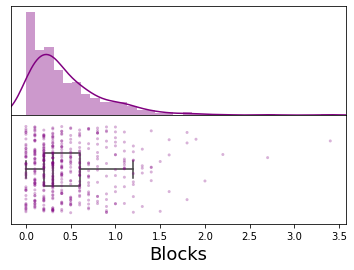

In [36]:
fig, axs = plt.subplots(nrows=2)

sns.distplot(
    dfMerged['BLK'], 
    ax=axs[0],
    color = 'purple'
)
sns.stripplot(
    dfMerged['BLK'], 
    jitter=0.4, 
    size=3,
    ax=axs[1],
    alpha=0.3,
    color = 'purple'
)
blk = sns.boxplot(
    dfMerged['BLK'],
    width=0.3, 
    ax=axs[1],
    showfliers=False,
)

# Align axes
spacer = np.max(dfMerged['BLK']) * 0.05
xmin = np.min(dfMerged['BLK']) - spacer
xmax = np.max(dfMerged['BLK']) + spacer
axs[0].set_xlim((xmin, xmax))
axs[1].set_xlim((xmin, xmax))

# Remove some axis text
axs[0].xaxis.set_visible(False)
axs[0].yaxis.set_visible(False)
axs[1].yaxis.set_visible(False)

# Put the two plots together
plt.subplots_adjust(hspace=0)

# Adjust boxplot fill to be white
axs[1].artists[0].set_facecolor('white')

# Rename Axis
blk.set_xlabel("Blocks", fontsize = 18)

Text(27.0, 0.5, 'Defensive Rebounds')

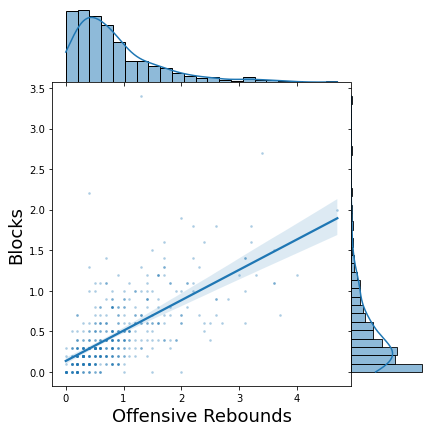

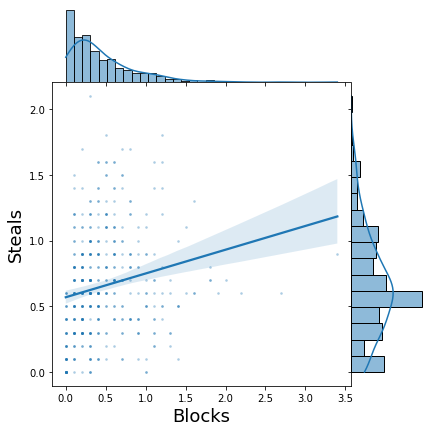

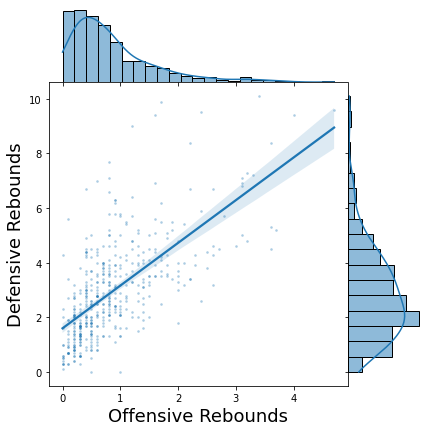

In [37]:
joint1 = sns.jointplot(
    x='ORB', 
    y='BLK', 
    data=dfMerged,
    kind="reg",
    ratio=4,
    space=0,
    scatter_kws={
        's': 3,
        'alpha': 0.25
    },
);

joint1.ax_joint.set_xlabel('Offensive Rebounds', fontsize = 18)
joint1.ax_joint.set_ylabel('Blocks', fontsize = 18)



joint1 = sns.jointplot(
    x='BLK', 
    y='STL', 
    data=dfMerged,
    kind="reg",
    ratio=4,
    space=0,
    scatter_kws={
        's': 3,
        'alpha': 0.25
    },
);

joint1.ax_joint.set_xlabel('Blocks', fontsize = 18)
joint1.ax_joint.set_ylabel('Steals', fontsize = 18)



joint1 = sns.jointplot(
    x='ORB', 
    y='DRB', 
    data=dfMerged,
    kind="reg",
    ratio=4,
    space=0,
    scatter_kws={
        's': 3,
        'alpha': 0.25
    },
);

joint1.ax_joint.set_xlabel('Offensive Rebounds', fontsize = 18)
joint1.ax_joint.set_ylabel('Defensive Rebounds', fontsize = 18)


In [38]:
dfMerged['OVR']=pd.to_numeric(dfMerged['OVR'])

Text(0.5, 1.0, 'OVR Vs. Blocks.')

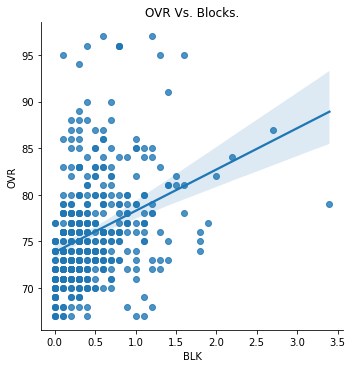

In [39]:
blockvsovr=sns.lmplot(x='BLK', y='OVR', data=dfMerged);
ax = plt.gca()

ax.set_title("OVR Vs. Blocks.")

Text(0.5, 1.0, 'OVR Vs. Steals.')

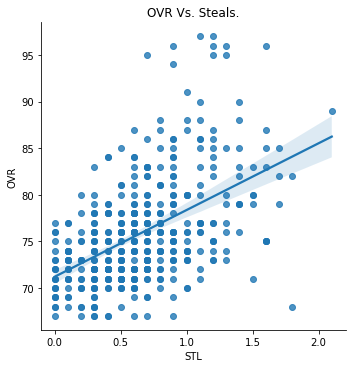

In [40]:
stealvsovr=sns.lmplot(x='STL', y='OVR', data=dfMerged);
ax = plt.gca()

ax.set_title("OVR Vs. Steals.")

<AxesSubplot:xlabel='STL', ylabel='OVR'>

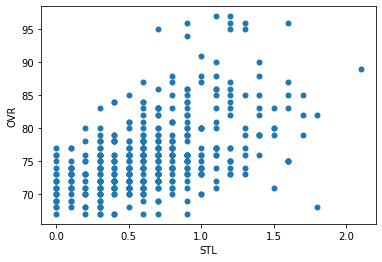

In [41]:
sns.scatterplot(x="STL", y="OVR",

               
                sizes=(1, 8), linewidth=0,
                data=dfMerged)

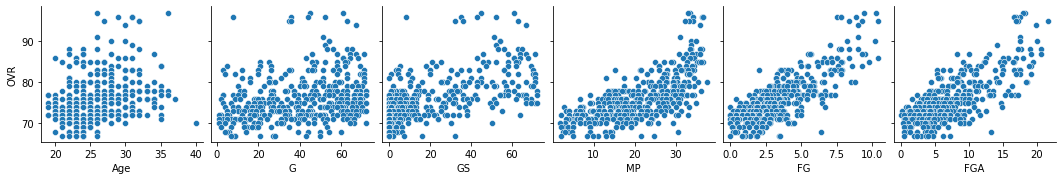

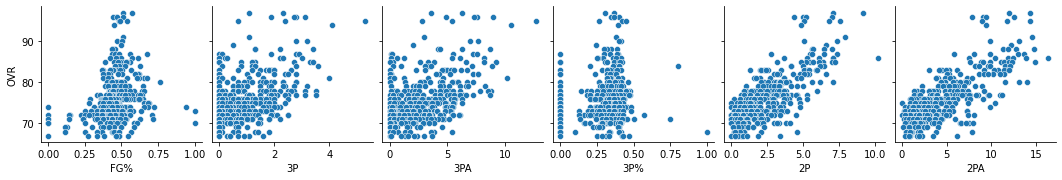

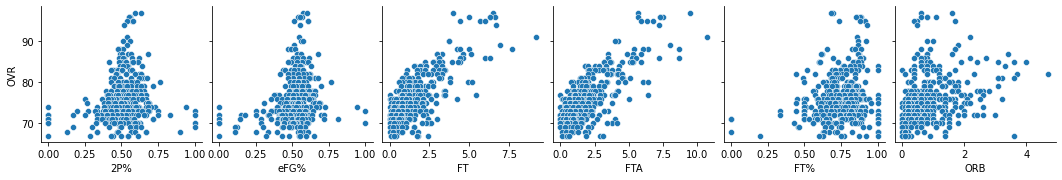

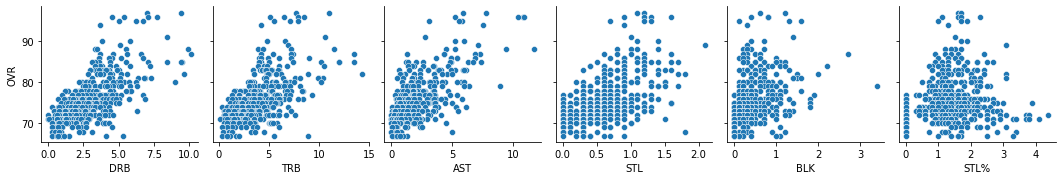

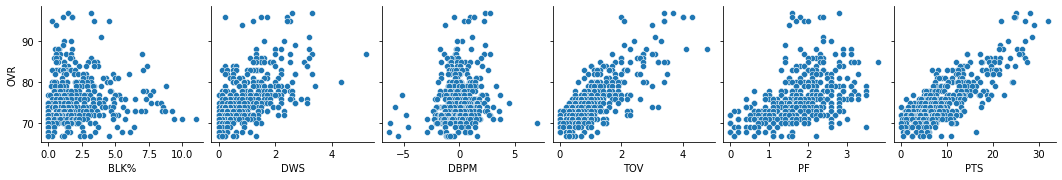

In [42]:
# Plot all of the features by OVR on the y-axis to see visually which have the strongest linear relationship
sns.pairplot(dfMerged, x_vars=['Age', 'G', 'GS', 'MP', 'FG', 'FGA'], y_vars="OVR")
sns.pairplot(dfMerged, x_vars=['FG%', '3P', '3PA', '3P%', '2P', '2PA'], y_vars="OVR")
sns.pairplot(dfMerged, x_vars=['2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB'], y_vars="OVR")
sns.pairplot(dfMerged, x_vars=['DRB', 'TRB', 'AST', 'STL', 'BLK', 'STL%',], y_vars="OVR")
sns.pairplot(dfMerged, x_vars=['BLK%', 'DWS', 'DBPM', 'TOV', 'PF', 'PTS'], y_vars="OVR")


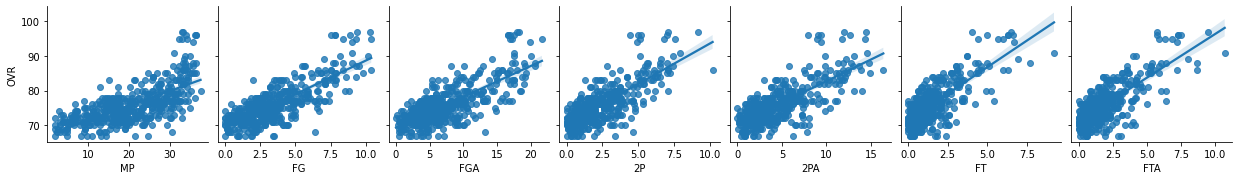

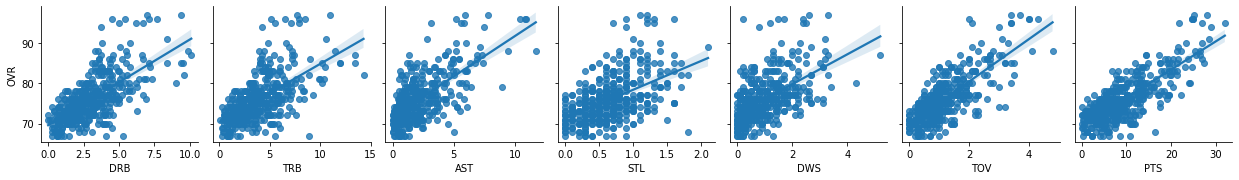

In [43]:
# The most linear ones
plot6 = sns.pairplot(dfMerged, kind='reg', x_vars=['MP', 'FG', 'FGA', '2P', '2PA', 'FT', 'FTA'], y_vars="OVR")
plot7 = sns.pairplot(dfMerged, kind='reg', x_vars=['DRB', 'TRB', 'AST', 'STL', 'DWS', 'TOV', 'PTS'], y_vars="OVR")

#plot6.set(xlabel='Sales Quarter',
       #ylabel='Total Sales',
       #title='Sales by Quarter')


# MP (minutes played) has more of an exponential relationship


<AxesSubplot:xlabel='BLK', ylabel='OVR'>

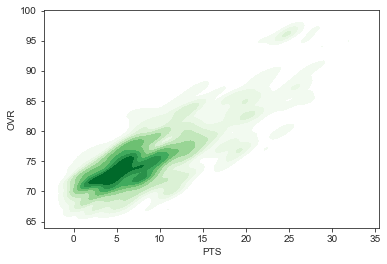

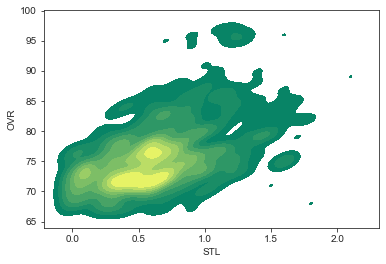

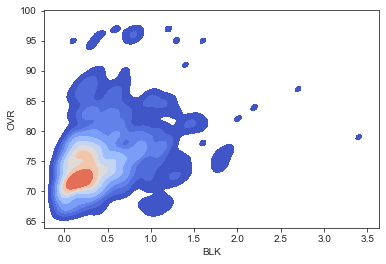

In [44]:
# The plots above were fine, but there is a lot of overplotting and we don't care as much about 
# specific points as the overall distribution. 
# We wanted to experiment with other types of visualizations, like 2D density plots


# Basic 2D density plots

# Using Seaborn
# OVR vs. Field Goals 
# set seaborn style
sns.set_style("ticks") # style must be one of white, dark, whitegrid, darkgrid, ticks
# plot data
plt.figure()
sns.kdeplot(x=dfMerged.PTS, y=dfMerged.OVR, cmap="Greens", shade=True, bw_adjust=.5)#, thresh=0)
plt.figure()
sns.kdeplot(x=dfMerged.STL, y=dfMerged.OVR, cmap="summer", shade=True, bw_adjust=.5)#, thresh=0)
plt.figure()
sns.kdeplot(x=dfMerged.BLK, y=dfMerged.OVR, cmap="coolwarm", shade=True, bw_adjust=.5)#, thresh=0)




In [45]:
# Seaborn color palletes:
'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 
'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 
'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 
'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 
'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 
'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 
'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 
'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 
'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 
'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 
'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 
'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 
'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 
'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 
'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 
'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 
'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 
'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

    

('viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r')

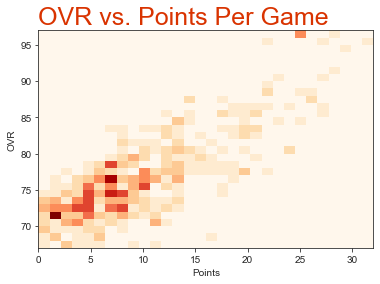

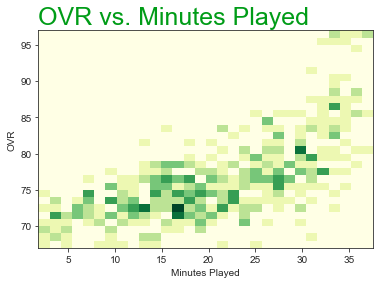

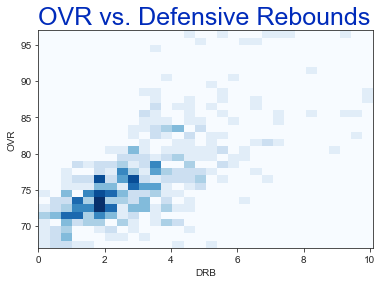

In [46]:
# Using Matplotlib


# Bin size 30
# OVR vs. Points
plt.hist2d(x=dfMerged.PTS, y=dfMerged.OVR, bins=(30, 30), cmap=plt.cm.OrRd)
font1 = {'family':'sans-serif','color':'#d93300','size':25}
plt.title("OVR vs. Points Per Game", loc = 'left', fontdict = font1)
plt.xlabel("Points")
plt.ylabel("OVR")
plt.show()

# OVR vs. Minutes Played
plt.hist2d(x=dfMerged.MP, y=dfMerged.OVR, bins=(30, 30), cmap=plt.cm.YlGn)
font1 = {'family':'sans-serif','color':'#009c17','size':25}
plt.title("OVR vs. Minutes Played", loc = 'left', fontdict = font1)
plt.xlabel("Minutes Played")
plt.ylabel("OVR")
plt.show()

# OVR vs. Minutes Played
plt.hist2d(x=dfMerged.DRB, y=dfMerged.OVR, bins=(30, 30), cmap=plt.cm.Blues)
font1 = {'family':'sans-serif','color':'#002bba','size':25}
plt.title("OVR vs. Defensive Rebounds", loc = 'left', fontdict = font1)
plt.xlabel("DRB")
plt.ylabel("OVR")
plt.show()


<Figure size 432x288 with 0 Axes>

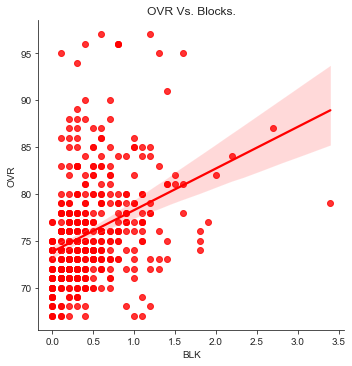

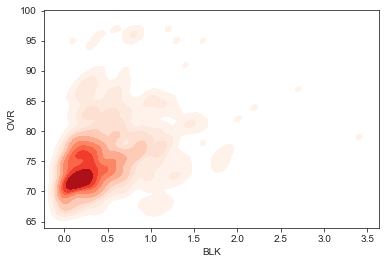

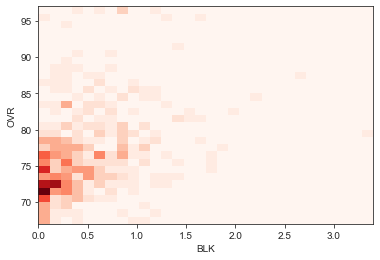

In [47]:
# Choosing the right way to visualize our data will be important 
# because we have 400 data points that can be overplotted
# These three plots use identical data (OVR vs. Blocks), but show it in different ways:

# Seaborn scatterplot with linear model
plt.figure()
blockvsovr=sns.lmplot(x='BLK', y='OVR', data=dfMerged, line_kws={'color': 'red'}, scatter_kws={"color": "red"});
ax = plt.gca()
ax.set_title("OVR Vs. Blocks.")

# Seaborn density plot
plt.figure()
sns.kdeplot(x=dfMerged.BLK, y=dfMerged.OVR, cmap="Reds", shade=True, bw_adjust=.5)#, thresh=0)

# Matplotlib heat map
plt.figure()
plt.hist2d(x=dfMerged.BLK, y=dfMerged.OVR, bins=(30, 30), cmap=plt.cm.Reds)
plt.xlabel("BLK")
plt.ylabel("OVR")
plt.show()



In [48]:
############### Linear Model

In [49]:
np.mean(dfMerged['OVR']) 
# The average OVR score among all players is about 76
# This is an example of a constant model for predicting OVR score
# We want to make a linear model that predicts OVR based on defensive stats

75.875

['lebron james',
 'giannis antetokounmpo',
 'kawhi leonard',
 'james harden',
 'james harden',
 'james harden',
 'stephen curry',
 'kevin durant',
 'anthony davis',
 'damian lillard',
 'joel embiid',
 'paul george',
 'kyrie irving',
 'jimmy butler',
 'trae young',
 'russell westbrook',
 'pascal siakam',
 'donovan mitchell',
 'rudy gobert',
 'kyle lowry',
 'jayson tatum',
 'devin booker',
 'ben simmons',
 'zion williamson',
 'khris middleton',
 'kemba walker',
 'demar derozan',
 'brandon ingram',
 'bam adebayo']

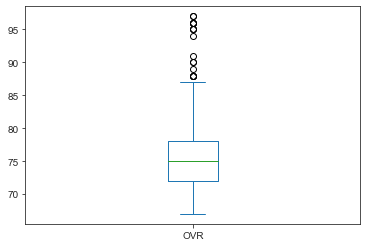

In [50]:
dfMerged.plot.box(y="OVR")
# We can see from this simple boxplot that the mean is around 76, with most of the OVR scores are between 72 and 78
# There are at least 8 high outliers
dfMerged.describe()['OVR']

# Who are the outliers?
topOVRs = list(dfMerged[dfMerged['OVR']>85]['Name'])
topOVRs

In [51]:
#Normalize? Regularize?
#Linear Model?
#sklearn.inspection.permutation_importance: ?
# https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html
# Training and Testing?

In [52]:
# Create a copy of the full data frame to begin training and testing
dfCopy = dfMerged
dfCopy # 456 rows × 34 columns

,Name,OVR,Pos,Tm,Age,G,GS,MP,FG,FGA,...,AST,STL,BLK,STL%,BLK%,DWS,DBPM,TOV,PF,PTS
0,lebron james,97,PG,LAL,36.0,45.0,45.0,33.4,9.4,18.3,...,7.8,1.1,0.6,1.6,1.5,2.6,2.3,3.7,1.6,25.0
1,giannis antetokounmpo,97,PF,MIL,26.0,61.0,61.0,33.0,10.3,18.0,...,5.9,1.2,1.2,1.7,3.2,3.3,2.8,3.4,2.8,28.1
2,kawhi leonard,96,SF,LAC,29.0,52.0,52.0,34.1,8.9,17.5,...,5.2,1.6,0.4,2.3,1.1,2.4,1.3,2.0,1.6,24.8
3,james harden,96,PG-SG,TOT,31.0,44.0,43.0,36.6,7.8,16.7,...,10.8,1.2,0.8,1.6,1.8,1.7,1.0,4.0,2.3,24.6
4,james harden,96,SG,HOU,31.0,8.0,8.0,36.3,7.5,16.9,...,10.4,0.9,0.8,1.1,1.8,0.2,-0.5,4.3,1.8,24.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,jared harper,67,PG,NYK,23.0,8.0,0.0,2.0,0.0,0.5,...,0.1,0.0,0.0,0.0,0.0,0.0,-5.5,0.4,0.1,0.4
452,jarrell brantley,67,PF,UTA,24.0,28.0,0.0,4.9,0.9,1.9,...,0.5,0.3,0.1,2.5,1.2,0.2,1.6,0.3,0.6,2.3
453,gabe vincent,67,PG,MIA,24.0,50.0,7.0,13.1,1.8,4.7,...,1.3,0.4,0.0,1.6,0.3,0.5,-0.9,0.7,1.6,4.8
454,justin robinson,67,PG,OKC,23.0,9.0,0.0,9.8,0.8,2.3,...,1.0,0.3,0.0,1.6,0.0,0.0,-1.0,0.2,1.1,2.3


In [53]:
# Select columns if we want to 
#data = select_columns(data, 'SalePrice', 'Gr_Liv_Area', 'Garage_Area','TotalBathrooms')

# Get only the numeric columns
# Help from: https://stackoverflow.com/questions/25039626/how-do-i-find-numeric-columns-in-pandas
numericColumns = dfCopy.select_dtypes(include=np.number).columns.tolist()

# Make a new dataframe that is only the numeric columns for linear modeling
dfNumeric = dfCopy[numericColumns]
dfNumeric

,OVR,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,AST,STL,BLK,STL%,BLK%,DWS,DBPM,TOV,PF,PTS
0,97,36.0,45.0,45.0,33.4,9.4,18.3,0.513,2.3,6.3,...,7.8,1.1,0.6,1.6,1.5,2.6,2.3,3.7,1.6,25.0
1,97,26.0,61.0,61.0,33.0,10.3,18.0,0.569,1.1,3.6,...,5.9,1.2,1.2,1.7,3.2,3.3,2.8,3.4,2.8,28.1
2,96,29.0,52.0,52.0,34.1,8.9,17.5,0.512,1.9,4.9,...,5.2,1.6,0.4,2.3,1.1,2.4,1.3,2.0,1.6,24.8
3,96,31.0,44.0,43.0,36.6,7.8,16.7,0.466,2.8,7.6,...,10.8,1.2,0.8,1.6,1.8,1.7,1.0,4.0,2.3,24.6
4,96,31.0,8.0,8.0,36.3,7.5,16.9,0.444,3.1,9.0,...,10.4,0.9,0.8,1.1,1.8,0.2,-0.5,4.3,1.8,24.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,67,23.0,8.0,0.0,2.0,0.0,0.5,0.000,0.0,0.1,...,0.1,0.0,0.0,0.0,0.0,0.0,-5.5,0.4,0.1,0.4
452,67,24.0,28.0,0.0,4.9,0.9,1.9,0.481,0.4,1.0,...,0.5,0.3,0.1,2.5,1.2,0.2,1.6,0.3,0.6,2.3
453,67,24.0,50.0,7.0,13.1,1.8,4.7,0.378,0.9,3.0,...,1.3,0.4,0.0,1.6,0.3,0.5,-0.9,0.7,1.6,4.8
454,67,23.0,9.0,0.0,9.8,0.8,2.3,0.333,0.4,1.6,...,1.0,0.3,0.0,1.6,0.0,0.0,-1.0,0.2,1.1,2.3


In [54]:
# Get rid of infinite and missing values

# First time we ran linear model - ValueError: Input contains NaN, infinity or a value too large for dtype('float64').
# Help from: 
#https://stackoverflow.com/questions/31323499/sklearn-error-valueerror-
#input-contains-nan-infinity-or-a-value-too-large-for

# df.replace([np.inf, -np.inf], np.nan, inplace=True)

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame)
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

# Drop the columns with missing and infinite values
dfCleaned = clean_dataset(dfNumeric)
dfCleaned # 421 rows × 31 columns

C:\Users\husto\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,OVR,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,AST,STL,BLK,STL%,BLK%,DWS,DBPM,TOV,PF,PTS
0,97.0,36.0,45.0,45.0,33.4,9.4,18.3,0.513,2.3,6.3,...,7.8,1.1,0.6,1.6,1.5,2.6,2.3,3.7,1.6,25.0
1,97.0,26.0,61.0,61.0,33.0,10.3,18.0,0.569,1.1,3.6,...,5.9,1.2,1.2,1.7,3.2,3.3,2.8,3.4,2.8,28.1
2,96.0,29.0,52.0,52.0,34.1,8.9,17.5,0.512,1.9,4.9,...,5.2,1.6,0.4,2.3,1.1,2.4,1.3,2.0,1.6,24.8
3,96.0,31.0,44.0,43.0,36.6,7.8,16.7,0.466,2.8,7.6,...,10.8,1.2,0.8,1.6,1.8,1.7,1.0,4.0,2.3,24.6
4,96.0,31.0,8.0,8.0,36.3,7.5,16.9,0.444,3.1,9.0,...,10.4,0.9,0.8,1.1,1.8,0.2,-0.5,4.3,1.8,24.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,67.0,23.0,8.0,0.0,2.0,0.0,0.5,0.000,0.0,0.1,...,0.1,0.0,0.0,0.0,0.0,0.0,-5.5,0.4,0.1,0.4
452,67.0,24.0,28.0,0.0,4.9,0.9,1.9,0.481,0.4,1.0,...,0.5,0.3,0.1,2.5,1.2,0.2,1.6,0.3,0.6,2.3
453,67.0,24.0,50.0,7.0,13.1,1.8,4.7,0.378,0.9,3.0,...,1.3,0.4,0.0,1.6,0.3,0.5,-0.9,0.7,1.6,4.8
454,67.0,23.0,9.0,0.0,9.8,0.8,2.3,0.333,0.4,1.6,...,1.0,0.3,0.0,1.6,0.0,0.0,-1.0,0.2,1.1,2.3


In [66]:
# Split this data into training and testing data
from sklearn.model_selection import train_test_split
train, val = train_test_split(dfCleaned, train_size=0.8, random_state=42)

In [74]:
train # 336 rows × 31 columns
val # 85 rows × 31 columns

,OVR,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,AST,STL,BLK,STL%,BLK%,DWS,DBPM,TOV,PF,PTS
149,77.0,24.0,72.0,72.0,32.6,5.0,9.3,0.543,1.9,4.4,...,2.1,1.1,0.9,1.6,2.4,2.6,0.9,0.8,1.6,13.5
353,72.0,28.0,19.0,17.0,30.4,5.0,9.0,0.556,0.5,1.6,...,1.9,0.8,1.2,1.3,3.8,0.6,0.0,1.1,2.4,11.9
180,76.0,23.0,25.0,13.0,15.0,2.5,4.9,0.508,0.5,1.7,...,1.3,0.9,0.3,2.7,1.8,0.5,1.3,0.8,2.5,7.1
396,71.0,21.0,37.0,9.0,12.1,1.0,2.6,0.375,0.3,1.4,...,0.5,0.3,0.3,1.1,2.6,0.4,-0.6,0.4,1.6,2.5
452,67.0,24.0,28.0,0.0,4.9,0.9,1.9,0.481,0.4,1.0,...,0.5,0.3,0.1,2.5,1.2,0.2,1.6,0.3,0.6,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,82.0,27.0,69.0,1.0,22.9,5.4,8.7,0.622,0.0,0.1,...,1.1,0.7,0.7,1.4,2.8,2.7,0.7,1.1,1.9,13.5
446,68.0,20.0,4.0,0.0,3.0,0.3,2.3,0.111,0.0,0.3,...,0.5,0.0,0.0,0.0,0.0,0.0,-6.3,0.0,0.0,1.3
24,86.0,29.0,68.0,68.0,33.4,7.5,15.8,0.476,2.2,5.4,...,5.4,1.1,0.1,1.5,0.4,2.2,-0.3,2.6,2.4,20.4
17,88.0,24.0,53.0,53.0,33.4,9.0,20.6,0.438,3.4,8.7,...,5.2,1.0,0.3,1.4,0.7,2.2,-0.2,2.8,2.2,26.4


In [76]:
# Split the data into new datframes
def select_columns(data, *columns):
    return data.loc[:, columns]

X_train = select_columns(train, 
                        'STL%',
                        'BLK%',
                        'DWS',
                        'DBPM',
                        'STL',
                        'BLK')
Y_train = train.loc[:,'OVR']

X_val = select_columns(val, 
                        'STL%',
                        'BLK%',
                        'DWS',
                        'DBPM',
                        'STL',
                        'BLK')
y_val = val.loc[:,'OVR']

In [77]:
# Import linear model
from sklearn import linear_model as lm
linear_model = lm.LinearRegression()

linear_model.fit(X_train, Y_train)
y_fitted = linear_model.predict(X_train)
y_predicted = linear_model.predict(X_val)

In [78]:
# Function, rsme to calculate the RMSE
from sklearn import metrics
def rmse(actual, predicted):
    return np.sqrt(metrics.mean_squared_error(actual, predicted))

In [79]:
# Use the rmse function to calculate the training error and validation error
training_error = rmse(y_fitted, Y_train)
val_error = rmse(y_predicted, y_val)
(training_error, val_error)

(4.014994718547894, 4.670194244035312)

In [ ]:
#add a a score using scikit learns score function

C:\Users\husto\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Residuals (Predicted OVR-Actual OVR)')

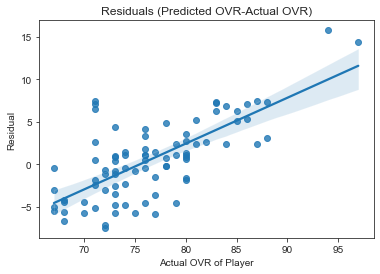

In [81]:
# Plot residuals
residuals = y_val - y_predicted
ax = sns.regplot(y_val, residuals)
ax.set_xlabel('Actual OVR of Player')
ax.set_ylabel('Residual')
ax.set_title('Residuals (Predicted OVR-Actual OVR)')

C:\Users\husto\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Actual OVR vs Predicted OVR')

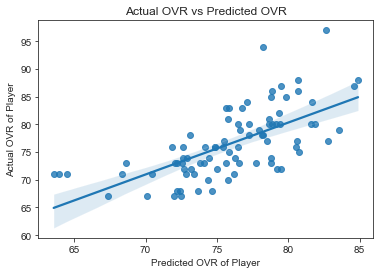

In [85]:
# Plot predicted vs. actual
ax = sns.regplot(y_predicted, y_val)
ax.set_xlabel('Predicted OVR of Player')
ax.set_ylabel('Actual OVR of Player')
ax.set_title('Actual OVR vs Predicted OVR')

In [ ]:
#Now we see from the two plots above and accuracy score (add this above) that our linear model hasn't found great success
#predicting OVRS.

In [ ]:
#We now fit a linear regression model based on offensive statistics in the hope that we can show
#they're of greater value when assigning a player an OVR rating. off in the database names below indicates offense. 

In [ ]:
#List of columns to help choose which to include in the offensive linear model:
#['Name', 'Pos', 'Tm', 'Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 
#'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'STL%', 'BLK%', 'DWS', 'DBPM', 'TOV', 'PF', 'PTS']

In [86]:
# Split the data into new datframes
def select_columns(data, *columns):
    return data.loc[:, columns]

X_trainoff = select_columns(train, 
                        'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%','FT', 'FTA', 'FT%', 'ORB',
                            'AST','PTS')
Y_trainoff = train.loc[:,'OVR']

X_valoff = select_columns(val, 
                        'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%','FT', 'FTA', 'FT%', 'ORB',
                            'AST','PTS')
y_valoff = val.loc[:,'OVR']

In [88]:
linear_modeloff = lm.LinearRegression()
linear_modeloff.fit(X_trainoff, Y_trainoff)
y_fittedoff = linear_modeloff.predict(X_trainoff)
y_predictedoff = linear_modeloff.predict(X_valoff)

In [89]:
# Use the rmse function to calculate the training error and validation error
training_erroroff = rmse(y_fittedoff, Y_trainoff)
val_erroroff = rmse(y_predictedoff, y_valoff)
(training_erroroff, val_erroroff)

(3.0211801621595247, 3.4563081826298716)

In [ ]:
#add a a score using scikit learns score function

C:\Users\husto\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Residuals (Predicted OVR-Actual OVR)')

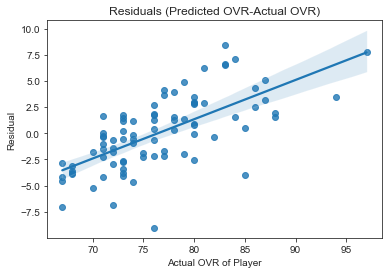

In [90]:
# Plot residuals
residualsoff = y_valoff - y_predictedoff
ax = sns.regplot(y_valoff, residualsoff)
ax.set_xlabel('Actual OVR of Player')
ax.set_ylabel('Residual')
ax.set_title('Residuals (Predicted OVR-Actual OVR)')

C:\Users\husto\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Actual OVR vs Predicted OVR')

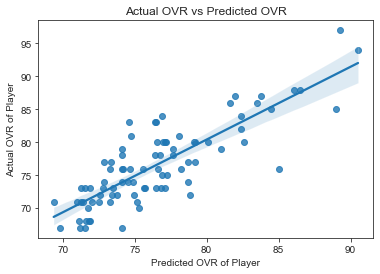

In [91]:
# Plot predicted vs. actual
ax = sns.regplot(y_predictedoff, y_valoff)
ax.set_xlabel('Predicted OVR of Player')
ax.set_ylabel('Actual OVR of Player')
ax.set_title('Actual OVR vs Predicted OVR')

In [ ]:
#CONclunk-ed

In [ ]:
#We now attempt to perform hypothesis tests on our data so we can test the significance of predicting variables:

In [114]:
from scipy import stats
params = np.append(linear_modeloff.intercept_,linear_modeloff.coef_)
predictions = linear_modeloff.predict(X_trainoff)
new_X = np.append(np.ones((len(X_trainoff),1)), X_trainoff, axis=1)
M_S_E = (sum((Y_trainoff-predictions)**2))/(len(new_X)-len(new_X[0]))
v_b = M_S_E*(np.linalg.inv(np.dot(new_X.T,new_X)).diagonal())
s_b = np.sqrt(v_b)
t_b = params/ s_b
p_val =[2*(1-stats.t.cdf(np.abs(i),(len(new_X)-len(new_X[0])))) for i in t_b]
p_val = np.round(p_val,3)
p_val

[ 3.44057310e+01 -1.05207108e+00  1.54403945e-01 -2.43565934e-01
  2.67454407e-01 -4.35999534e-01 -1.70482513e+00  1.17095587e+00
 -6.00452161e-01 -1.00883031e+00 -5.71634163e-03 -3.99872973e-01
 -4.22500965e-01 -1.20783574e+00  4.37509623e-01  3.85958995e+00
  1.13201939e+00]


array([0.   , 0.294, 0.877, 0.808, 0.789, 0.663, 0.089, 0.242, 0.549,
       0.314, 0.995, 0.69 , 0.673, 0.228, 0.662, 0.   , 0.258])

In [104]:
#Make a dataframe to display the different predicting variables side by side with there coefficients, and then make
#conclusions about which the significant ones are. 

In [105]:
linear_modeloff.feature_names_in_

array(['FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%',
       'FT', 'FTA', 'FT%', 'ORB', 'AST', 'PTS'], dtype=object)